# **CIS 4190/5190 Homework 2 - Fall 2025**

In [6]:
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## **PennGrader Setup**
First, you'll need to set up the PennGrader, an autograder we are going to use throughout the semester. The PennGrader will automatically grade your answer and provide you with an instant feedback. Unless otherwise stated, you can resubmit up to a reasonable number of attempts (e.g. 100 attempts per day). **We will only record your latest score in our backend database**.

After finishing each homework assignment, you must submit your iPython notebook to Gradescope before the homework deadline. Gradescope will then retrieve and display your scores from our backend database.

In [7]:
%%capture
!pip install penngrader-client

In [8]:
%%writefile student_config.yaml
grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting student_config.yaml


In [9]:
from penngrader.grader import *

## **Autograder Setup**
Enter your 8-digit PennID below:

In [10]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 12345678       # YOUR PENN-ID GOES HERE AS AN INTEGER#

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immediately get a score.

**NOTE:** Remember we store your submissions and check against other student's submissions... so, not that you would, but no cheating.

In [11]:
grader = PennGrader('student_config.yaml', 'cis5190_f25_HW2', STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 12345678

Make sure this correct or we will not be able to store your grade


In [12]:
# Serialization code needed by the autograder
import inspect, sys
from IPython.core.magics.code import extract_symbols

def new_getfile(object, _old_getfile=inspect.getfile):
    if not inspect.isclass(object):
        return _old_getfile(object)

    # Lookup by parent module (as in current inspect)
    if hasattr(object, '__module__'):
        object_ = sys.modules.get(object.__module__)
        if hasattr(object_, '__file__'):
            return object_.__file__

    # If parent module is __main__, lookup by methods (NEW)
    for name, member in inspect.getmembers(object):
        if inspect.isfunction(member) and object.__qualname__ + '.' + member.__name__ == member.__qualname__:
            return inspect.getfile(member)
    else:
        raise TypeError('Source for {!r} not found'.format(object))
inspect.getfile = new_getfile

def grader_serialize(obj):
    cell_code = "".join(inspect.linecache.getlines(new_getfile(obj)))
    class_code = extract_symbols(cell_code, obj.__name__)[0][0]
    return class_code

## **Datasets**
Next, we will download all datasets from GitHub to your local runtime.

In [13]:
if not os.path.exists("cis5190_hw2_diabetes_train.csv"):
    !wget https://raw.githubusercontent.com/upenn/cis-4190-5190-fall-25/main/hw2/cis5190_hw2_diabetes_train.csv

if not os.path.exists("cis5190_hw2_diabetes_X_test.csv"):
    !wget https://raw.githubusercontent.com/upenn/cis-4190-5190-fall-25/main/hw2/cis5190_hw2_diabetes_X_test.csv

In [14]:
train_df = pd.read_csv("cis5190_hw2_diabetes_train.csv")
train_df

,OHQ575Q,INDFMPIR,LBDSGBSI,OHQ565,DIABETIC,OHX28CSC,OHX19SE,URDECPLC,BMXBMI,BMXWT,...,DMDEDUC2,RIDAGEYR,LBXTC,ALQ120Q,BMXWAIST,BPQ020,RIDRETH1,BMXLEG,RIAGENDR,BMXHT
0,NaN,1.52,28.0,NaN,0,NaN,0.0,0.0,20.2,59.2,...,NaN,18,154.0,NaN,75.5,2.0,5,42.0,1,171.0
1,NaN,3.09,28.0,NaN,0,NaN,NaN,NaN,21.1,61.8,...,3.0,57,224.0,1.0,90.7,2.0,2,39.0,2,171.0
2,NaN,5.00,29.0,NaN,0,NaN,NaN,NaN,22.1,63.1,...,4.0,29,170.0,2.0,81.2,2.0,2,40.0,2,169.0
3,NaN,5.00,NaN,NaN,0,NaN,NaN,NaN,NaN,6.8,...,NaN,0,NaN,NaN,NaN,NaN,1,NaN,2,NaN
4,NaN,2.13,31.0,NaN,0,NaN,NaN,0.0,21.7,65.8,...,3.0,61,115.0,7.0,77.2,1.0,3,41.5,1,174.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8135,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,5,NaN,2,NaN
8136,NaN,1.29,31.0,NaN,0,NaN,NaN,0.0,30.6,87.9,...,1.0,79,184.0,0.0,117.5,2.0,1,39.0,1,169.4
8137,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,31.7,90.4,...,NaN,17,NaN,NaN,108.7,2.0,4,41.7,2,168.9
8138,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2.0,58,NaN,NaN,NaN,2.0,4,NaN,1,NaN


# **1. Logistic Regression [14pts]**

## **1.1. Logistic Regression Implementation [12 pts, autograded]**

Implement logistic regression with both L1 and L2 regularization by completing the `LogisticRegression` class.  

Your class must implement the following API:

* `__init__(alpha, tol, max_iter, beta_init, penalty, lambd)`
* `sigmoid(x)`
* `compute_cost(beta, X, y)`
* `compute_gradient(beta, X, y)`
* `has_converged(beta_old, beta_new)`
* `fit(X, y)`
* `predict_proba(X)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the `LogisticRegression` class. **DO NOT** change the API.

---

### **1.1.1. Sigmoid Function [1 pt]**

You should begin by implementing the `sigmoid` function.  As you may know, the sigmoid function $\sigma(x)$ is mathematically defined as follows.

> $\sigma(x) = \frac{1}{1\ +\ \text{exp}(-x)}$

**Be certain that your sigmoid function works with both vectors and matrices** --- for either a vector or a matrix, you function should perform the sigmoid function on every element.

---

### **1.1.2. Cost Function [3 pts]**

The `compute_cost` function should compute the cost for a given $\beta$ vector. The cost is a scalar value given by:

> $
L({\beta}) = -\sum_{i =1}^N [ y_i\log(f_{{\beta}}({x}_i)) + (1 - y_i)\log(1 - f_{{\beta}}({x}_i))]
$

where
> $
f_{\beta}(x_{i}) = \sigma(\beta^{T}x_{i})
$


L1 Regularization Loss:
>$
L1({\beta}) = L({\beta}) + \lambda \sum_{j = 1}^D  |{\beta}_j|
$

L2 Regularization Loss:
>$
L2({\beta}) = L({\beta}) + \lambda \sum_{j = 1}^D  {\beta}_j^2
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\beta$ is a $D + 1$ dimensional vector, with the first element (index ${j=0}$) being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **1.1.3. Gradient of the Cost Function [3 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\beta$. Hint: Use the dot product function `np.dot` or `.dot()` to compute gradients efficiently.

---

### **1.1.4. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer to *Section 1.1.5* below for the convergence condition.

---

### **1.1.5. Training [2 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `beta_`. The weights start as a zero vector. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_beta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\beta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\beta}_\mathit{new} -  {\beta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance).

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\beta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **1.1.6. Predict Probability [1 pt]**

The `predict_probability` function should predict the probabilities that the data points in a given input data matrix belong to class 1.

---

### **1.1.7. Predict [1 pt]**

The `predict` function should predict the classes of the data points in a given input data matrix.

---

### **Implementation Diagram**
```plaintext

 ┌─────────────────────────────────────────────┐
 | __init__(alpha, tol, max_iter, beta_init,   |
 |          penalty, lambd)                    |
 └─────────────────────────────────────────────┘
                       │
                       ▼
 ┌─────────────────────────────────────────────┐
 | fit(X, y)                                   |
 |  Loop per-iteration:                        |
 |   - compute_gradient(beta, X, y)            |
 |   - compute_cost(beta, X, y)                |
 |   - has_converged(beta_old, beta_new) ?     |
 └─────────────────────────────────────────────┘
                       │
                       ▼
 ┌─────────────────────────────────────────────┐
 | predict_proba(X)                            |
 |  - sigmoid(Xβ)                              |
 └─────────────────────────────────────────────┘
                       │
                       ▼
 ┌─────────────────────────────────────────────┐
 | predict(X)                                  |
 |  - threshold probabilities at 0.5           |
 └─────────────────────────────────────────────┘

In [15]:
class LogisticRegression:

    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    beta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    beta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_beta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores beta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration

    """

    def __init__(self, alpha=0.01, tol=0.0001, max_iter=10000, beta_init=None, penalty = None, lambd = 1.0):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter
        self.beta_init = beta_init
        self.penalty = penalty
        self.lambd = lambd
        self.beta_ = None
        self.hist_cost_ = None
        self.hist_beta_ = None

    def get_params(self, deep=True):
        # a function needed for using cross_val_score function from sklearn.model_selection
        return {"alpha": self.alpha, "max_iter": self.max_iter, "lambd" : self.lambd, "penalty" : self.penalty}

    def sigmoid(self, x):

        """
        Compute the sigmoid value of the argument.

        Parameters
        ----------
        x: numpy.ndarray

        Returns
        -------
        out: numpy.ndarray
            The sigmoid value of x
        """

        # STUDENT TODO START: Complete the function
        return 1 / (1 + np.exp(-x))
        # STUDENT TODO END

    def compute_cost(self, beta, X, y):

        """
        Compute the cost/objective function.

        Parameters
        ----------
        beta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # STUDENT TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        cost = 0
        N = X.shape[0]

        for i in range(N):
            cost += (y[i] * np.log(self.sigmoid(beta.dot(X[i]))))  +((1 - y[i]) * np.log(1 - self.sigmoid(beta.dot(X[i]))))
        if self.penalty == "l1":
            return -cost + self.lambd * np.abs(beta[1:])
        elif self.penalty == "l2":
            return -cost + self.lambd * beta[1:].dot(beta[1:])
        # STUDENT TODO END
        return -cost
    def compute_gradient(self, beta, X, y):

        """
        Compute the gradient of the cost function. Hint: Use the dot product function np.dot or .dot() to compute gradients efficiently.

        Parameters
        ----------
        beta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # STUDENT TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        val = self.sigmoid(X.dot(beta))
        para = beta.copy()
        para[0] = 0
        if self.penalty == "l2":
            return -(y - val).dot(X) + 2 * self.lambd * para
        elif self.penalty == "l1":
            ans = -(y - val).dot(X)
            return ans + self.lambd * np.sign(para)
        return -(y - val).dot(X)
        # STUDENT TODO END

    def has_converged(self, beta_old, beta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        beta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        beta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # STUDENT TODO START: Complete the function
        if (beta_old - beta_new).dot(beta_old - beta_new) <= self.tol:
           return True
        return False
        # STUDENT TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as beta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.beta_init is None:
            beta_old = np.zeros((D + 1,))
            self.beta_init = beta_old
        else:
            beta_old = self.beta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_beta_ = np.array([beta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(beta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])

        # STUDENT TODO START: Complete the function
        N = X.shape[0]
        for i in range(self.max_iter):
            for i in range(N):
                beta = self.compute_gradient(self.beta_init,X,y)
                beta_old = self.beta_init
                self.beta_init -= self.alpha * beta
                cost = self.compute_cost(self.beta_init,X,y)
                print("beta_init: ",self.beta_init)
                self.hist_beta_ = np.vstack((self.hist_beta_ , self.beta_init.reshape(1,-1)))
                # self.hist_beta_ = np.append(self.hist_beta_,[self.beta_init])
                # self.hist_cost = np.append(self.hist_cost_,[cost])
                self.hist_cost_ = np.append(self.hist_cost_,[cost])
                if self.has_converged(beta_old,self.beta_init):
                    break
        # STUDENT TODO END

    def predict_proba(self, X):

        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))

        # STUDENT TODO START: Complete the function
        return self.sigmoid(X.dot(self.beta_init))
        # STUDENT TODO END

    def predict(self, X):

        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """

        # STUDENT TODO START: Complete the function
        return np.where(self.predict_proba(X) >= 0.5, 1, 0)
        # STUDENT TODO END

In [16]:
def test_log_reg_sigmoid(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case = np.array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])
    student_ans = student_lr_clf.sigmoid(test_case)
    required_ans = np.array([0.83539354, 0.35165864, 0.3709434 , 0.25483894, 0.70378922])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_sigmoid(LogisticRegression)

In [17]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_sigmoid', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [18]:
def test_log_reg_compute_cost(StudentLogisticRegression):

    test_case_beta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_cost(test_case_beta, test_case_X, test_case_y)
    required_ans = 7.467975765663204
    print("student_ans: ",student_ans)
    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_beta, test_case_X, test_case_y)
    required_ans = 7.52915138076548
    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_beta, test_case_X, test_case_y)
    required_ans = 7.505400330283089
    assert np.abs(student_ans - required_ans) <= 1e-2

test_log_reg_compute_cost(LogisticRegression)

student_ans:  7.46797573976548


In [19]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_compute_cost', answer = grader_serialize(LogisticRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [20]:
def test_log_reg_compute_gradient(StudentLogisticRegression):

    test_case_beta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_gradient(test_case_beta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.20203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_beta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.30203139])
    # print("student_ans: ",student_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_beta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.32438267])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_compute_gradient(LogisticRegression)

In [21]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_compute_gradient', answer = grader_serialize(LogisticRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [22]:
def test_log_reg_has_converged(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case_beta_old = np.array([ 1.62434536, -0.61175641])
    test_case_beta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_clf.has_converged(test_case_beta_old, test_case_beta_new)
    required_ans = True

    assert student_ans == required_ans

test_log_reg_has_converged(LogisticRegression)

In [23]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_has_converged', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [24]:
def test_log_reg_fit(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.hist_beta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
                             [ 0.005     , -0.00597503,  0.00564325],
                             [ 0.01006813, -0.01184464,  0.0111865 ],
                             [ 0.01520121, -0.01761226,  0.01663348],
                             [ 0.02039621, -0.02328121,  0.02198778],
                             [ 0.02565018, -0.0288547 ,  0.02725288]])
    print("student_ans: ",student_ans)

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_fit(LogisticRegression)

beta_init:  [ 0.005      -0.00597503  0.00564325]
beta_init:  [ 0.01006813 -0.01184464  0.0111865 ]
beta_init:  [ 0.01520121 -0.01761226  0.01663348]
beta_init:  [ 0.02039621 -0.02328121  0.02198778]
beta_init:  [ 0.02565018 -0.0288547   0.02725288]
student_ans:  [[ 0.          0.          0.        ]
 [ 0.005      -0.00597503  0.00564325]
 [ 0.01006813 -0.01184464  0.0111865 ]
 [ 0.01520121 -0.01761226  0.01663348]
 [ 0.02039621 -0.02328121  0.02198778]
 [ 0.02565018 -0.0288547   0.02725288]]


In [25]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_fit', answer = grader_serialize(LogisticRegression))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [26]:
def test_log_reg_predict_proba(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict_proba(test_case_X)
    required_ans = np.array([0.49052814, 0.5029122 , 0.48449386, 0.48864172, 0.50241207])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

test_log_reg_predict_proba(LogisticRegression)

beta_init:  [ 0.005      -0.00597503  0.00564325]
beta_init:  [ 0.01006813 -0.01184464  0.0111865 ]
beta_init:  [ 0.01520121 -0.01761226  0.01663348]
beta_init:  [ 0.02039621 -0.02328121  0.02198778]
beta_init:  [ 0.02565018 -0.0288547   0.02725288]


In [27]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_predict_proba', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [28]:
def test_log_reg_predict(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict(test_case_X)
    required_ans = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
                             0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

    assert np.mean(np.abs(student_ans - required_ans)) <= 0.02

test_log_reg_predict(LogisticRegression)

beta_init:  [-0.02        0.00054803  0.06794325]
beta_init:  [-0.0373724   0.00293431  0.12825487]
beta_init:  [-0.05250837  0.00677021  0.18187786]
beta_init:  [-0.06574627  0.01172475  0.22965418]
beta_init:  [-0.07737337  0.01752236  0.27232144]


In [29]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_log_reg_predict', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.2. Effect of learning rate on gradient descent [2 pts, manually graded]**



Run the below cell to download the dataset.

In [30]:
if not os.path.exists("cis5190_hw2_admit.csv"):
    !wget https://raw.githubusercontent.com/upenn/cis-4190-5190-fall-25/main/hw2/cis5190_hw2_admit.csv

In [31]:
train_df = pd.read_csv("cis5190_hw2_admit.csv")

The dataset contains two features - scores in two exams (input variables) and whether the student was admitted into a college or not (target variable) . Your task for this question is to use this dataset and plot the variation of cost function with respect to the number of gradient descent iterations for different learning rates. Perform the following steps.

1. Scale the features using `StandardScaler`
2. For each of the learning rates - {0.001, 0.01, 0.1, 0.25}, fit a logistic regression model to the scaled data by running a maximum of **100 iterations** of gradient descent with **L2 penalty** and **$\lambda$ as 0.001**.
3. Show the variation of the cost (stored in `hist_cost_`) with respect to the number of iterations for all the learning rates in the same plot.

The plot should have an appropriate title, axes labels, and legend. **Briefly comment on the effect of increasing learning rate and what would be the best learning rate among the four values based on the plot.**

In [32]:
from sklearn.preprocessing import StandardScaler
# STUDENT TODO START:
o
# STUDENT TODO END

NameError: name 'o' is not defined

# **2. K-Nearest Neighbors [4 pts]**
While doing classification, KNN searches the memorized training instances for the K instances that most closely resemble the new instance and assigns to it the most common class. An alternate way of understanding KNN is by looking at the learned decision boundaries. In this problem, you will implement a function to classify points in the X-Y coordinates using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The training dataset used is the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), and each point in the 2D-space will be classified into one of the three classes using its x-coordinate (sepal length) and y-coordinate (sepal width).

## **2.1. Load Iris Dataset**
Please complete the load_dataset function to
- Populate `X_train` with Iris dataset features. We use only the sepal length and width for this exercise, i.e. the first two columns in the dataset
- Populate `y_train` with labels (species)
- return `X_train` and `y_train`

In [33]:
from sklearn import datasets

def load_iris_dataset():
    '''
    Args:
        None
    Returns:
        X_train, y_train
    Notes:
        1. Please do not change the provided code
    '''
    # Import training data
    iris = datasets.load_iris()

    # STUDENT TODO START:
    return iris.data , iris.target
    # STUDENT TODO END

# Load the iris dataset first
X_train, y_train = load_iris_dataset()


## **2.2. Standardize the Features [2 pts, autograded]**
Please complete the standardize_features function to
standardize the features by subtracting the mean and scaling to unit variance. i.e

 > $z = \frac{(x - u)}{s}$

where `u` is the mean of the training data and `s` is the standard deviation of the training data.

**Notes**:
* Here, centering and scaling need to happen independently on each feature (column) of the training data.
* Please implement this function yourself, **do NOT use sklearn's StandardScaler**.
* You are encouraged to use `numpy` as well as `numpy` vectorization/broadcasting techniques to speed up the calculations.

In [34]:
def standardise_features(X_train):

  '''
  Args:
      X_train: Training dataset
  Returns:
      X_train (After Standardization)
  Notes:
      1. Please do not change the provided code
  '''

  # STUDENT TODO START:
  col = X_train.shape[1]
  for i in range(col):
    feature = X_train[:,i]
    u = np.mean(feature)
    s = np.std(feature)
    feature = (feature - u) / s
    X_train[:,i] -= u
    X_train[:,i] /= s
    
  # STUDENT TODO END
  return X_train
X_train = standardise_features(X_train)

In [35]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_knn_standardise', answer = grader_serialize(standardise_features))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **2.3. Plot KNN Decision Boundary [2 pts, manually graded]**
Please complete the plot_KNN_boundary function to:
* Train a KNN classifier with `k` neighbors using the provided `X_train` and `y_train`
* Make predictions using `X_test` and save the result as `y_test`

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

def plot_KNN_boundary(k, X_train, y_train):
    '''
    Args:
        k: Number of neighbors to use for k neighbors queries.
        X_train: Training dataset features
        y_train: Labels

    Returns:
        None
    Notes:
        1. Please do not change the provided code
        2. Save the predicted labels as y_test for plotting
    '''

    # Mesh 2d space into grid to generate X_test and y_test
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)
    y_test_flat = np.zeros(X_test.shape[0])
    print("y_test.shape: ",y_test.shape)
    # STUDENT TODO START:
    # 1. train a KNN classifier
    # 2. save the predictions on X_test in y_test
    X_row = X_test.shape[0]
    train = X_train[:,:2]
    for i in range(X_row):
        X = train - X_test[i]
        ans = X ** 2
        ans = np.sum(ans ,axis=1) ** 0.5
        idx = np.argpartition(ans , k)[:k]
        index = y_train[idx]
        # print("index: ",index)
        counts = np.bincount(index)
        y_test_flat[i] = np.argmax(counts)
    y_test = y_test_flat.reshape(xx.shape)
    # STUDENT TODO END

    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Also plot the training points
    iris_target_names = ['setosa', 'versicolor', 'virginica']
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=map(lambda y: iris_target_names[y], y_train),
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))
    plt.xlabel("standardised sepal length")
    plt.ylabel("standardised sepal width")
    plt.show()

### Explore the effect of changing k on the learned decision boundaries.
**State briefly whether the model underfits/overfits as k increases and explain why**:

y_test.shape:  (377, 319)


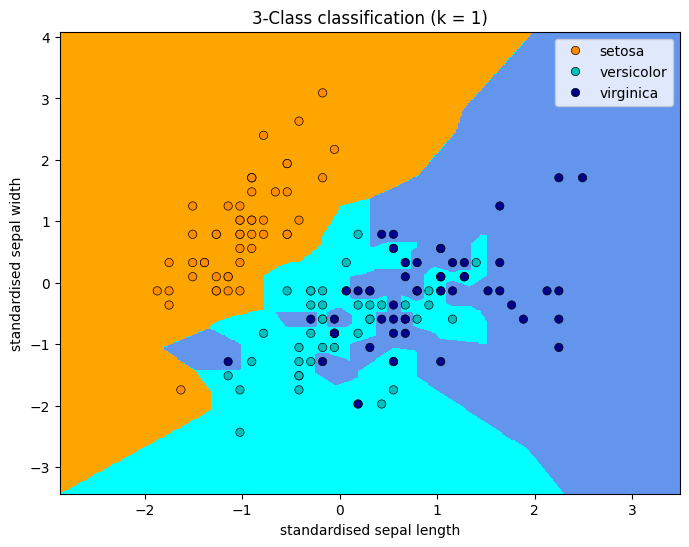

y_test.shape:  (377, 319)


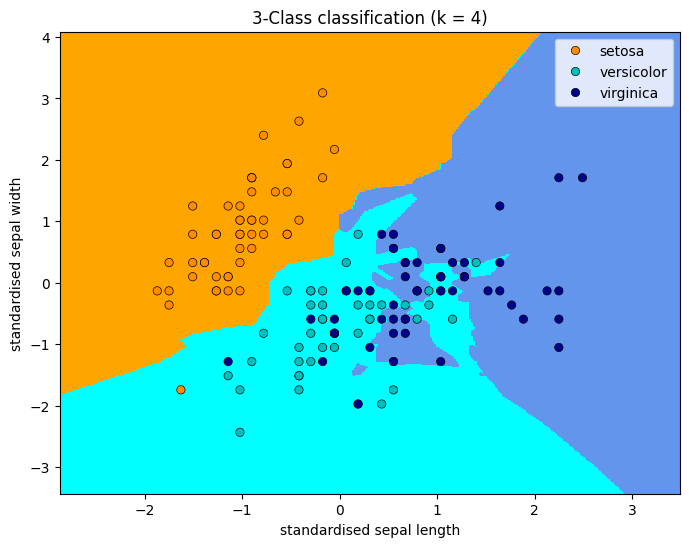

y_test.shape:  (377, 319)


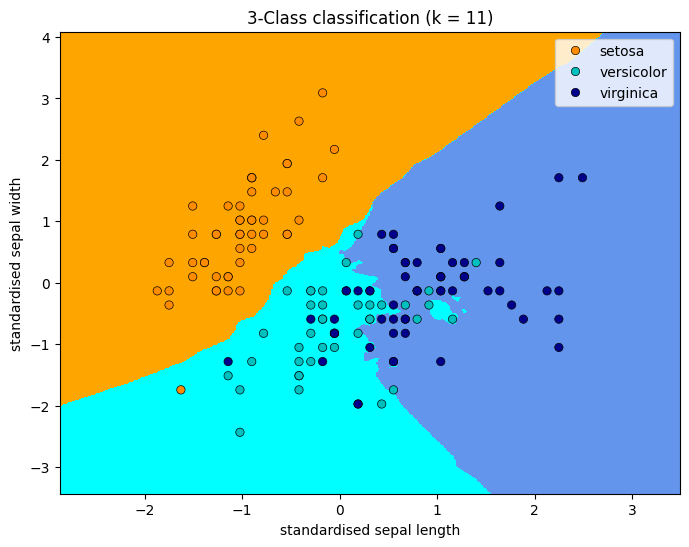

y_test.shape:  (377, 319)


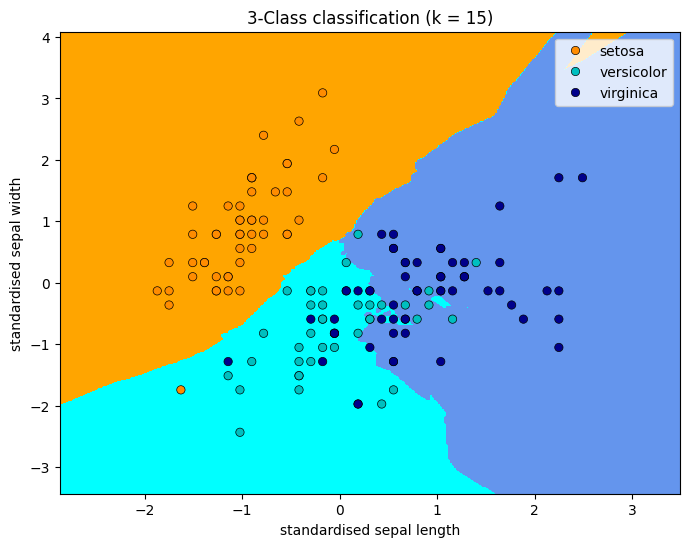

In [71]:
# Plot KNN decision boundaries with different k values
def visualize_KNN(X_train, y_train):

    k_list = [1, 4, 11, 15]

    # STUDENT TODO START: Call plot_KNN_boundary function for each value of k in k_list
    for i in k_list:
        plot_KNN_boundary(i , X_train,y_train)
    # STUDENT TODO END

visualize_KNN(X_train, y_train) ### Comment out this line when submitting ###

# **3. Measures of Impurity and their Reduction [8 pts]**
To grow a classification tree, instead of a binary error (0/1), measures of impurity are used to see how good a leaf node is. Recall that we discussed about **entropy** being one such measure of impurity. We will be working with entropy and comparing it to another metric called the **Gini Index**.

## **3.1. Measures of Impurity [4 pts]**

For this problem, consider a binary classification problem of two classes: the positive class $1$ and the negative class $0$.



### **3.1.1. Entropy [1 pt, autograded]**

Please complete the `entropy` function.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def entropy(prob_class1):

    """
    Returns the entropy value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        e: The entropy value for the node
    """

    # STUDENT TODO START:
    # STUDENT TODO END

assert entropy(0.5) == 1

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_entropy', answer = grader_serialize(entropy))

### **3.1.2. Gini Index [1 pt, autograded]**

Gini index is another measure of impurity. For an K-class classification problem, Gini Index is calculated as follows.

$$\text{Gini Index} = \sum_{k = 1}^{K} p_k(1 - p_k)$$

Complete the following function for calculating the Gini Index of a binary-class problem (k = 2).

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gini_index(prob_class1):

    """
    Returns the gini-index value of a node given the probability of a sample belonging to class 1 in the node.

    Args:
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node

    Returns:
        gi: The Gini Index value for the node
    """

    # STUDENT TODO START:

    # STUDENT TODO END

assert gini_index(0.5) == 0.5

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_index', answer = grader_serialize(gini_index))

### **3.1.3. Impurity measures plot [2 pts, manually graded]**

Please complete the `impurity_measures_plot` function and generate a plot of the **entropy** and **Gini Index** values with respect to the class 1 probability values. Both the impurity measures should be on the **same plot**.

- Make sure the plot has a title, legend and axes labels.
- **Comment on why entropy and gini index are suitable measures of impurity based on the plot.**

In [ ]:
def impurity_measures_plot():

    """
    Plots the entropy and gini index values with respect to the probability values of class 1.
    Args:
        None
    Returns:
        None
    """

    prob_class1_arr = np.arange(1, 1000)/1000
    e_arr = np.array([entropy(p) for p in prob_class1_arr])
    gi_arr = np.array([gini_index(p) for p in prob_class1_arr])

    # STUDENT TODO START:

    # STUDENT TODO END

impurity_measures_plot()

## **3.2. Reduction in Impurity [4 pts]**

Recall that we also discussed **information gain** which is the change in entropy from the parent node to the children nodes. **Gini reduction** is similar to information gain except you replace entropy values with gini index.

Calculate both given the number of samples and number of class 1 samples in the parent and child nodes.

### **3.2.1. Information Gain [2 pts, autograded]**




In [ ]:
def information_gain(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        ig: Information Gain
    """

    # STUDENT TODO START: Complete the function
    # 1. You will need to calculate entropy for the parent and child nodes
    # 2. Use the above entropies to finally calculate information gain

    # STUDENT TODO END


assert np.abs(information_gain(100, 60, 30, 5) - 0.251) < 0.01

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_information_gain', answer = (grader_serialize(entropy), grader_serialize(information_gain)))

### **3.2.2. Gini Reduction [2 pts, autograded]**

In [ ]:
def gini_reduction(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args:
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        gr: Gini Reduction
    """

    # STUDENT TODO START:

    # STUDENT TODO END

assert np.abs(gini_reduction(100, 60, 30, 5) - 0.161) < 0.01

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_reduction', answer = (grader_serialize(gini_index), grader_serialize(gini_reduction)))

# **4. Decision Tree [7 pts + 7 pts for 5190]**

In this section you will be training a decision tree classifier to predict the presence of diabetes in a person given various input features. The diabetes dataset that we are using is from the [2013-2014  National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx). We have reduced the dataset to only 20 features but the original dataset had over 1,800 features. `cis5190_hw2_diabetes_train.csv` and `cis5190_hw2_diabetes_X_test.csv` are the datasets that you would be using for training and testing respectively.

## **4.1. Load Datasets**

Read the files `cis5190_hw2_diabetes_train.csv` and `cis5190_hw2_diabetes_X_test.csv` into `train_df` and `test_df` respectively in the `load_diabetes_datasets` function.

In [72]:
import pandas as pd

def load_diabetes_datasets():
    '''
    Args:
        None
    Returns:
        train_df, test_df
    '''

    # STUDENT TODO START:
    train_df = pd.read_csv('cis5190_hw2_diabetes_train.csv')
    test_df = pd.read_csv('cis5190_hw2_diabetes_X_test.csv')
    return train_df , test_df
    # STUDENT TODO END

## **4.2. Preprocess Datasets [2 pts, autograded]**

The datasets we have provided are not ready-to-use for machine learning and requires preprocessing. We want you to perform feature selection and handle missing values in both the training and test datasets.

### **4.2.1. Feature Selection**

For feature selection, you should retain **at least** the following features and experiment with **including/excluding** the remaining features.

- 'RIDAGEYR'
- 'BMXWAIST'
- 'BMXHT'
- 'LBXTC'
- 'BMXLEG'
- 'BMXWT'
- 'BMXBMI'
- 'RIDRETH1'
- 'BPQ020'
- 'ALQ120Q'
- 'DMDEDUC2'
- 'RIAGENDR'
- 'INDFMPIR'

The column `DIABETIC` should be in the training dataset (not testing) as the target variable.

### **4.2.2. Handling Missing Values**

Perform the following:
* Drop rows with missing values in the training set
* You should not drop rows with missing values in the test set. Instead, you should *impute missing values in the test set* with the mean of the corresponding columns in the training set.

In [74]:
train_df, test_df = load_diabetes_datasets()
from sklearn.impute import SimpleImputer

# Preprocessing
def preprocess_datasets(train_df, test_df):
    '''
    Args:
        train_df
        test_df
    Returns:
        train_df (preprocessed)
        test_df (preprocessed)
    '''

    # STUDENT TODO START:
    print("train_df: ",train_df)
    # STUDENT TODO END
train_df_processed, test_df_processed = preprocess_datasets(train_df, test_df)

train_df:        OHQ575Q  INDFMPIR  LBDSGBSI  OHQ565  DIABETIC  OHX28CSC  OHX19SE  \
0         NaN      1.52      28.0     NaN         0       NaN      0.0   
1         NaN      3.09      28.0     NaN         0       NaN      NaN   
2         NaN      5.00      29.0     NaN         0       NaN      NaN   
3         NaN      5.00       NaN     NaN         0       NaN      NaN   
4         NaN      2.13      31.0     NaN         0       NaN      NaN   
...       ...       ...       ...     ...       ...       ...      ...   
8135      NaN       NaN       NaN     NaN         0       NaN      NaN   
8136      NaN      1.29      31.0     NaN         0       NaN      NaN   
8137      NaN       NaN       NaN     NaN         0       NaN      0.0   
8138      NaN       NaN       NaN     NaN         0       NaN      NaN   
8139      NaN      0.02      29.0     2.0         0       6.0      0.0   

      URDECPLC  BMXBMI  BMXWT  ...  DMDEDUC2  RIDAGEYR  LBXTC  ALQ120Q  \
0          0.0    20.2   5

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_preprocess_datasets', answer = (train_df_processed.to_csv(index=False), test_df_processed.to_csv(index=False)))

## **4.3. Decision Tree Training with Pruning [5 pts autograded]**

Next, we will be fitting a decision tree classifier and prune the tree appropriately. The `DecisionTreeClassifier` in scikit-learn uses a way of pruning called **Minimal Cost-Complexity Pruning**. We won't cover the specifics, but you can learn more from this [link](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) if you wish. But, you don't need to learn the details in order to use it effectively. The amount of pruning is entirely dependent on the value of the `ccp_alpha` parameter. In order to tune the `ccp_alpha` parameter, you will use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). The purpose of cross-validation is to estimate how well a model will generalize on unseen data.

Implement the function `best_ccp_alpha_f1` to do automatic tuning of the `ccp_alpha` parameter.  Your function should vary the value of the `ccp_alpha` parameter and return the value for `ccp_alpha` with the highest cross-validation F1 score over the given dataset `train_df`. The sklearn library has a [built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to generate a list of effective ccp_alphas. Given the imbalanced nature of the dataset, most of the people in the data set are non-diabetic. You can get a model with very high test accuracy by always predicting no one is diabetic. To address this problem, more importance should be given to the [F1 score](https://en.wikipedia.org/wiki/F-score) of your model rather than the classification accuracy.

Once you are done with your modeling process, test your model on the test dataset and output your predictions into the PennGrader.

For this problem, you need to have at least **80% accuracy** and a **F1 score of 0.2** on the test dataset to get full points.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

train_df, test_df = preprocess_datasets(train_df, test_df)

def best_ccp_alpha_f1(train_df):
    """
    Returns the pruning parameter (best_ccp_alpha) with the highest cross-validation F1 score along with the
    five cross-validation F1 scores corresponding (cv_f1_scores).

    Args:
        train_df: the training set

    Returns:
        best_ccp_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores

    """

    # STUDENT TODO START:

    # STUDENT TODO END

def refit_and_predict(train_df, test_df, best_ccp_alpha):
    """
    Fit a decision tree classifier on the training data using the best_ccp_alpha value and output the predictions on the
    test set.

    Args:
        train_df: the training set
        test_df: the test set
        best_ccp_alpha: the tuned best ccp alpha value

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # STUDENT TODO START:

    # STUDENT TODO END

best_ccp_alpha, cv_f1_scores = best_ccp_alpha_f1(train_df)
y_test_pred_DT = refit_and_predict(train_df, test_df, best_ccp_alpha)

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_refit_and_predict', answer = y_test_pred_DT)

## **4.4. Computing Confidence Intervals [3 pts autograded, 5190 extra]**

Even though you may have computed the average F1 score across the held-out folds during cross validation, how confident can you be that the number you computed is the true F1 score for that set of features? If you try rerunning your code with a different random seed, you may actually get a different F1 score. But which one is right?

In order to answer this question, we will compute a confidence interval based on the Student's t-distribution, which will tell us with **99\% confidence** that the true mean is within a lower and upper bound. To compute the confidence interval, we need to compute the sample mean, $\bar{x}$, sample standard deviation, $S$, and the number of observations for each classifier, $n$. ***In our specific case, the number of observations should be 5 because we have 5 reported F1 scores from cross-validation.***

Then, the confidence interval is computed by
    
$$\bar{x} \pm t \cdot \frac{S}{\sqrt{n}}$$

Here, $t$ is the critical value, which you should look up using the provided **t-table** (https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf). Round the critical value to the hundreths place. **Do not use scipy.stats.**

For example, when $n=10$, if we are looking for a 99\% confidence interval, then the number in the 99\% confidence column with degrees of freedom of $n-1=9$ would be $t=3.25$. Then, we can plug in all of the statistics into the confidence interval formula and get a range of values for which we are 99\% confident that the true F1 score of the classifier falls between.

For this computation, we should use the unbiased estimator of the **variance**, which means that the degrees of freedom on the standard deviation calculation must be set. Look in the optional arguments of `np.std` to learn more.

In [ ]:
def calculate_confidence_interval(cv_f1_scores):
    """
    Args:
      cv_f1_scores: np.array, reported cross-validation F1 scores
    Returns:
      interval: np.array, lower bound and upper bound of the 99% confidence interval
    """

    # STUDENT TODO START: this function should be able to handle confidence level of 99%

    # STUDENT TODO END

In [ ]:
def test_confidence_intervals():
    data = np.array([15.6, 16.2, 22.5, 20.5, 16.4])
    result = np.round(calculate_confidence_interval(data), 3)
    interval = np.array([11.918, 24.562])
    assert (np.array_equal(interval, result))

test_confidence_intervals()

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_confidence_intervals', answer = grader_serialize(calculate_confidence_interval))

## **4.5. Performance Table [4 pts manually graded, 5190 extra]**

Repeat the process for two other random sets of features and present a performance table (like the one shown below) that compares the F1 scores and confidence intervals of the three sets of features, indicating which one is your chosen best set. Remember that each set should at least include the 13 features mentioned in *Section 4.2*.

---

S.No. | Features | Best CCP Alpha | Mean Cross-validation F1 Score | Cross-validation F1 Score Confidence Interval
--- | --- | --- | --- | ---
1 | Set 1 | | |
2 | Set 2 | | |
3 | Set 3 | | |


# **5. Fit the Logistic Regression on Diabetes dataset (With only the required features in 4.2) [3 pts autograded, 5190 extra]**

Fit a simple logistic regression on the training data using L2 penalty, $\alpha$ = 0.01, maximum of iterations = 1000, and weight for the regularization constant for the L2 penalty term = 0.001.
You should be rescaling features using `MinMaxScaler` from `sklearn.preprocessing` to make sure that the features are properly scaled for learning.

In [ ]:
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def fit_and_predict_logistic(train_df, test_df):
    """
    Fit a logistic regression classifier on the training data and output the predictions on the
    test set.

    Args:
        train_df: the training set
        test_df: the test set

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # STUDENT TODO START:

    # STUDENT TODO END

y_test_pred_logistic = fit_and_predict_logistic(train_df, test_df)

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_fit_and_predict_logistic', answer = grader_serialize(LogisticRegression))

# **6. Neural Networks and Comparing LR, NN, and DT [7 pts]**

Similar to question 5, fit a Neural Network on the diabetes datasets.

## **6.0 Neural Networks Visualization [0pts]**
<!-- `Cite: TensorFlow` -->

Here is a handy worksheet provided by TensorFlow that can aid you in understanding neural network structures. This interactive tool allows you to visualize and experiment with a variety of complex neural network models. You can select your dataset and adjust parameters such as the ratio of training to test data, noise rate, batch size, feature categories, number of hidden layers and neurons per layer, learning rate, activation function, regularization type and rate, as well as the task type. Exploring these settings will help you gain deeper insight into how these design choices influence the training processes and model outcomes.



[Link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2,2,2,2,2&seed=0.32529&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

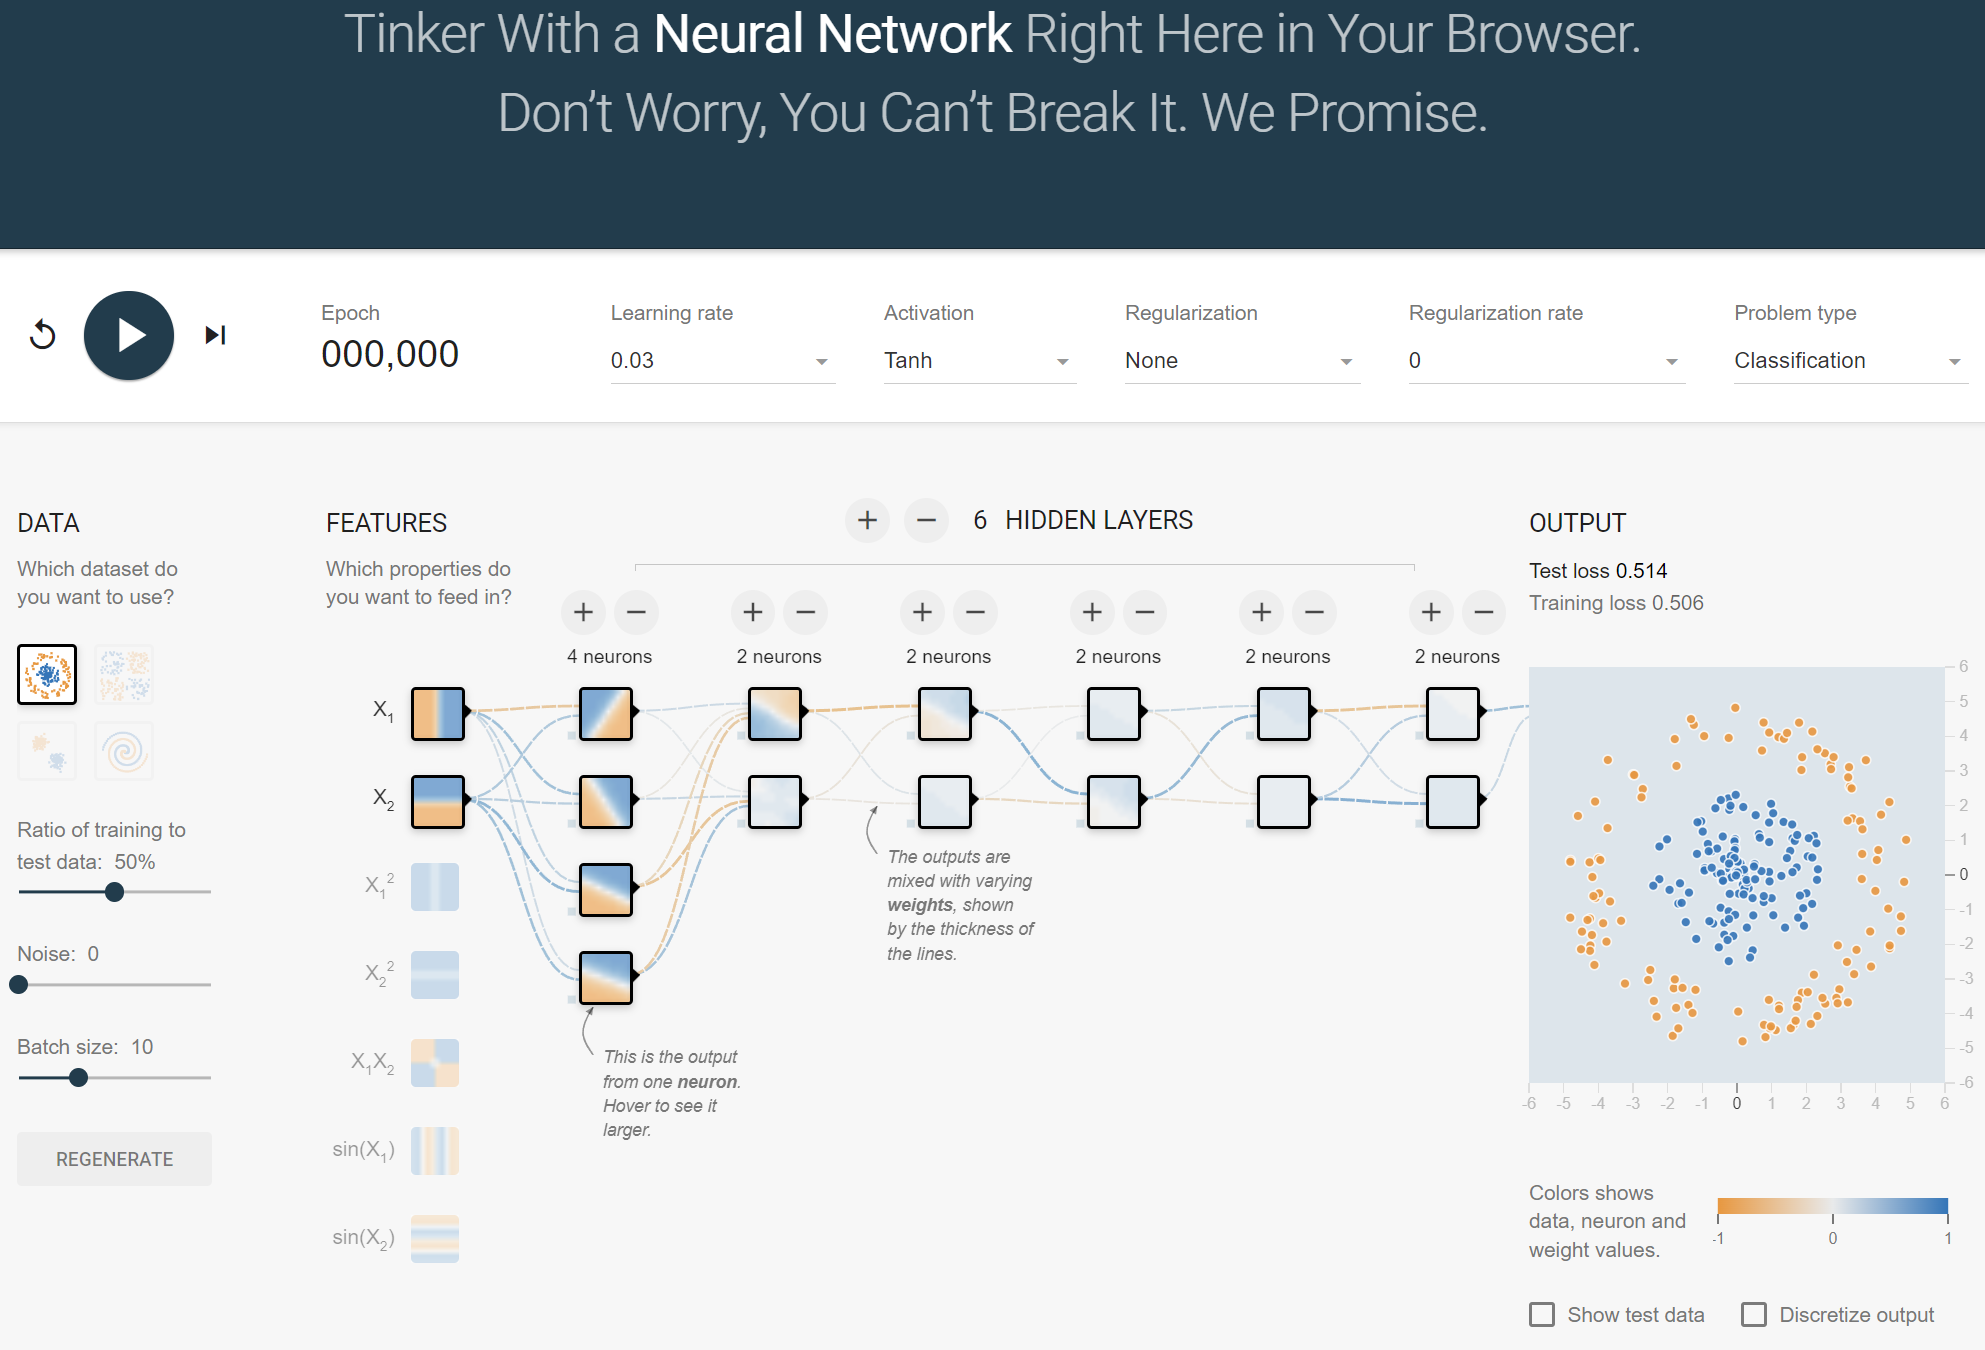

## **6.1 Code a Simple Neural Network Model**

PyTorch is a powerful and flexible deep learning framework widely used for building, training, and experimenting with neural networks. Its key feature is the dynamic computational graph, which allows the network architecture to be modified on-the-fly during execution, making debugging and experimentation easier compared to static graph frameworks. PyTorch’s **Autograd** module automatically handles the computation of gradients during the backpropagation process, which is crucial for training neural networks. With native support for GPU acceleration, it enables fast computation of tensor operations, speeding up the training process for large-scale models. These features, combined with its user-friendly interface and extensive ecosystem, make PyTorch ideal for both research and real-world applications.

We will use it to build a simple **2 hidden layered neural network**. Since this is a simple network, we will code and use a custom autograd. Under the hood, each primitive autograd operator is really two functions that operate on Tensors. The `forward` function computes output Tensors from input Tensors. The `backward` function receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

In PyTorch, we can easily define our own autograd operator by defining a subclass of `torch.autograd.Function` and implementing the forward and backward functions. We can then use our new autograd operator by constructing an instance and calling it like a function, passing Tensors containing input data.

Please refer the below helpful links: [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) and [here](https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd) to understand the below tasks and make them easy to code. We want to use this way of training model so that you may get an idea as to how training works under the hood.

In [73]:
train_df, test_df = load_diabetes_datasets()
train_df, test_df = preprocess_datasets(train_df, test_df)

NameError: name 'preprocess_datasets' is not defined

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(42)

In [ ]:
# Firstly, we will implement a custom autograd operator.
# Note that we want to calculate output in the forward pass as:
# output = input x transpose(weight) + bias

class CustomLinearFunction(torch.autograd.Function):
    """
    A custom autograd Function for a linear transformation.

    This Function computes the linear transformation in the forward pass
    and manually computes the gradients in the backward pass.

    Methods
    -------
    forward(ctx, input, weight, bias)
        Computes the linear transformation output.
    backward(ctx, grad_output)
        Computes the gradients of the loss with respect to input, weight, and bias.
    """

    @staticmethod
    def forward(ctx, input, weight, bias):
        """
        Performs the forward pass of the linear layer.

        Parameters
        ----------
        ctx : torch.autograd.FunctionContext
            A context object to save information for backward computation.
        input : torch.Tensor
            The input tensor of shape (N, in_features).
        weight : torch.Tensor
            The weight tensor of shape (out_features, in_features).
        bias : torch.Tensor
            The bias tensor of shape (out_features).

        Returns
        -------
        output : torch.Tensor
            The result of the linear transformation, shape (N, out_features).
        """
        # Save tensors input, weight and bias for backward pass
        ctx.save_for_backward(input, weight, bias)
        # STUDENT TODO START: Compute the forward pass

        # STUDENT TODO END

        # Return the output
        return output

    @staticmethod
    def backward(ctx, grad_output):
        """
        Performs the backward pass of the linear layer.

        Parameters
        ----------
        ctx : torch.autograd.FunctionContext
            The context object with saved tensors from the forward pass.
        grad_output : torch.Tensor
            The gradient of the loss with respect to the output.

        Returns
        -------
        grad_input : torch.Tensor or None
            Gradient with respect to the input, shape (N, in_features).
        grad_weight : torch.Tensor or None
            Gradient with respect to the weight, shape (out_features, in_features).
        grad_bias : torch.Tensor or None
            Gradient with respect to the bias, shape (out_features).
        """
        # Retrieve saved tensors
        input, weight, bias = ctx.saved_tensors

        # Initialize gradients to None
        grad_input = grad_weight = grad_bias = None


        # STUDENT TODO START: Check if each input requires gradients
        # ctx.needs_input_grad is a tuple of booleans that will check if gradient update is required

        # STUDENT TODO END

        # Return gradients in the same order as inputs to forward()
        return grad_input, grad_weight, grad_bias

In [ ]:
# Next we will have to build a custom linear layer

class CustomLinear(nn.Module):
    """
    A custom linear layer module using the CustomLinearFunction.

    This module defines a linear transformation with simplified parameter initialization
    and uses the custom autograd function for forward and backward computations.

    Parameters
    ----------
    in_features : int
        Size of each input sample.
    out_features : int
        Size of each output sample.

    Attributes
    ----------
    weight : torch.nn.Parameter
        The learnable weights of the module of shape (out_features, in_features).
    bias : torch.nn.Parameter
        The learnable bias of the module of shape (out_features).

    Methods
    -------
    reset_parameters()
        Initializes the weights and bias with a simplified method.
    forward(input)
        Applies the linear transformation to the input.
    """
    def __init__(self, in_features, out_features):
        super(CustomLinear, self).__init__()
        # STUDENT TODO START: Initialize the weights

        # STUDENT TODO END
        self.bias = nn.Parameter(torch.empty(out_features))
        # Initialize parameters
        self.reset_parameters()

    def reset_parameters(self):
        """
        Initializes the weights and bias of the layer.

        We use a simplified initialization where weights are sampled from a normal distribution
        and biases are initialized to zero.
        """
        # STUDENT TODO START

        # STUDENT TODO END

    def forward(self, input):
        """
        Applies the custom linear transformation to the input.

        Parameters
        ----------
        input : torch.Tensor
            The input tensor of shape (N, in_features).

        Returns
        -------
        output : torch.Tensor
            The output tensor of shape (N, out_features).
        """
        # Use the custom autograd function
        # STUDENT TODO START

        # STUDENT TODO END

In [ ]:
# Now, we will build our NN

class CustomNeuralNetwork(nn.Module):
    """
    A simple neural network with two hidden layers using CustomLinear layers.

    This network demonstrates how to integrate the custom linear layer into a model.

    Parameters
    ----------
    input_size : int
        Number of input features.
    hidden_size1 : int
        Number of neurons in the first hidden layer.
    hidden_size2 : int
        Number of neurons in the second hidden layer.
    output_size : int
        Number of output neurons.

    Attributes
    ----------
    layer1 : CustomLinear
        The first custom linear layer.
    layer2 : CustomLinear
        The second custom linear layer.
    output_layer : CustomLinear
        The output custom linear layer.

    Methods
    -------
    forward(x)
        Defines the forward pass of the network.
    """

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(CustomNeuralNetwork, self).__init__()
        # Define layers using the CustomLinear module
        self.layer1 = CustomLinear(input_size, hidden_size1)
        self.layer2 = CustomLinear(hidden_size1, hidden_size2)
        self.output_layer = CustomLinear(hidden_size2, output_size)

    def forward(self, x):
        """
        Defines the computation performed at every call.

        Parameters
        ----------
        x : torch.Tensor
            Input tensor of shape (N, input_size).

        Returns
        -------
        output : torch.Tensor
            Output tensor of shape (N, output_size).
        """
        # STUDENT TODO START

        # STUDENT TODO END

## **6.2 Fit the Neural Network on Diabetes Dataset [5 pts, autograded]**

Use only the required features in 4.2 and consider using `numpy.squeeze()` on the final predictions. The output shape should be (N, 1).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df.iloc[:, :-1].values)
y_train = train_df.iloc[:, -1].values
X_test = scaler.transform(test_df.values)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Ensure y is of shape (N, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

input_size = X_train_tensor.shape[1]  # Number of features
hidden_size1 = 64
hidden_size2 = 32
output_size = 1

# Instantiate the neural network
model = CustomNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.001)

num_epochs = 1000

# Store your predictions in the below variable
predictions = None

for epoch in range(num_epochs):
# STUDENT TODO START

# STUDENT TODO END

y_test_pred_NN = (predictions_np >= 0.5).astype(int)

In [ ]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_fit_and_predict_NN', answer = y_test_pred_NN)

## **6.3 Best Model on Diabetes Dataset, and Why. [2 pts manually graded]**

Which one of **Logistic Regression, Neural Network, and Decision Tree** models provide the best performance on this dataset? Give reasons for your answer with comparisons of the metric generated in *Section 4.5*, and provide further explanations about general cases in real scenarios.

# Submission

- Submit the notebook as a `.ipynb` file to the coding portion of the Gradescope submission. This can be done in Google Colab via the `File - Download .ipynb` menu option.